# Model Kurma

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
hitters = pd.read_csv("Hitters.csv")
df = hitters.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dummies = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
x_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
dummies = dummies.drop(["League_A","Division_E","NewLeague_A"],axis = 1).astype("float64")
x = pd.concat([x_,dummies],axis = 1)

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.25
                                                ,random_state = 42)

In [5]:
from sklearn.linear_model import Ridge

In [6]:
ridge_model = Ridge(alpha = 0.1).fit(x_train,y_train)
#alpha aslında modeldeki lambda parametresi.bazı kaynaklarda alpha bazı kaynaklarda lambda olarak söylenmektedir.

In [7]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

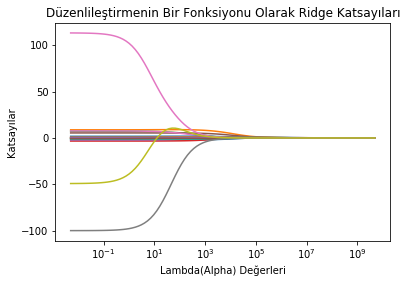

In [10]:
lambdadeger = 10**np.linspace(10,-2,100)*0.5
ridge_model = Ridge()
katsayilar = []
for i in lambdadeger:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(x_train,y_train)
    katsayilar.append(ridge_model.coef_)
#Bu döngü ile belirlenen lambda değerleri belirlenip ona göre katsayılar oluşturulur ve lambda değerlerine göre katsayıların değişimi görülebilir.
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(lambdadeger,katsayilar)
ax.set_xscale('log')#x ekseninde olan lambda değerlerine logaritma dönüşümü uygulanması için
#bu durum görselliği ve sayıları düzeltir.

plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar")
plt.title("Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları");

In [11]:
#renklerin her biri farklı katsayıları ifade eder.
#ridge regresyonda hiçbir katsayı sıfır yapılmaz etkileri az olacak olsa bile sıfır olmaz.
#ceza değerleri arttıkça katsayılar sıfıra yaklaşır.
#Katsayıların bağımlı değişkene etkileri ve önemlerine göre bu ceza değerleri belirlenir.

# Tahmin 

In [12]:
tahmin_test = ridge_model.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(mean_squared_error(y_test,tahmin_test))

357.0517922282835

In [19]:
df["Salary"].mean()

535.9258821292775

In [18]:
r2_score(y_test,tahmin_test)

0.411084490506764

# Model Tuning 

In [20]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [22]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar,scoring = "neg_mean_squared_error",normalize = True)

In [23]:
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [24]:
ridge_cv.alpha_

0.7599555414764666

In [25]:
ridgetune = Ridge(alpha = ridge_cv.alpha_,normalize = True).fit(x_train,y_train)

In [26]:
y_tahmin = ridgetune.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_tahmin))

386.6826429756415

In [27]:
r2_score(y_test,y_tahmin)

0.3092833676940344